In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle
import seaborn as sns

%matplotlib inline

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [40]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [41]:
ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

###### Missing Value Treatment

In [42]:
# Mean
# Median
# Mode
# KNN imputer

In [43]:
df.BMI.replace(0,df.BMI.mean(),inplace=True) #Mean replacement

In [44]:
# If we having missing na, we can use fillna

In [45]:
df.BloodPressure.replace(0,df.BloodPressure.mean(),inplace=True)
df.Insulin.replace(0,df.Insulin.mean(),inplace=True)
df.Glucose.replace(0,df.Glucose.mean(),inplace=True)
df.SkinThickness.replace(0,df.SkinThickness.mean(),inplace=True)

In [49]:
ProfileReport(df).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

###### Outlier Handling

<AxesSubplot:>

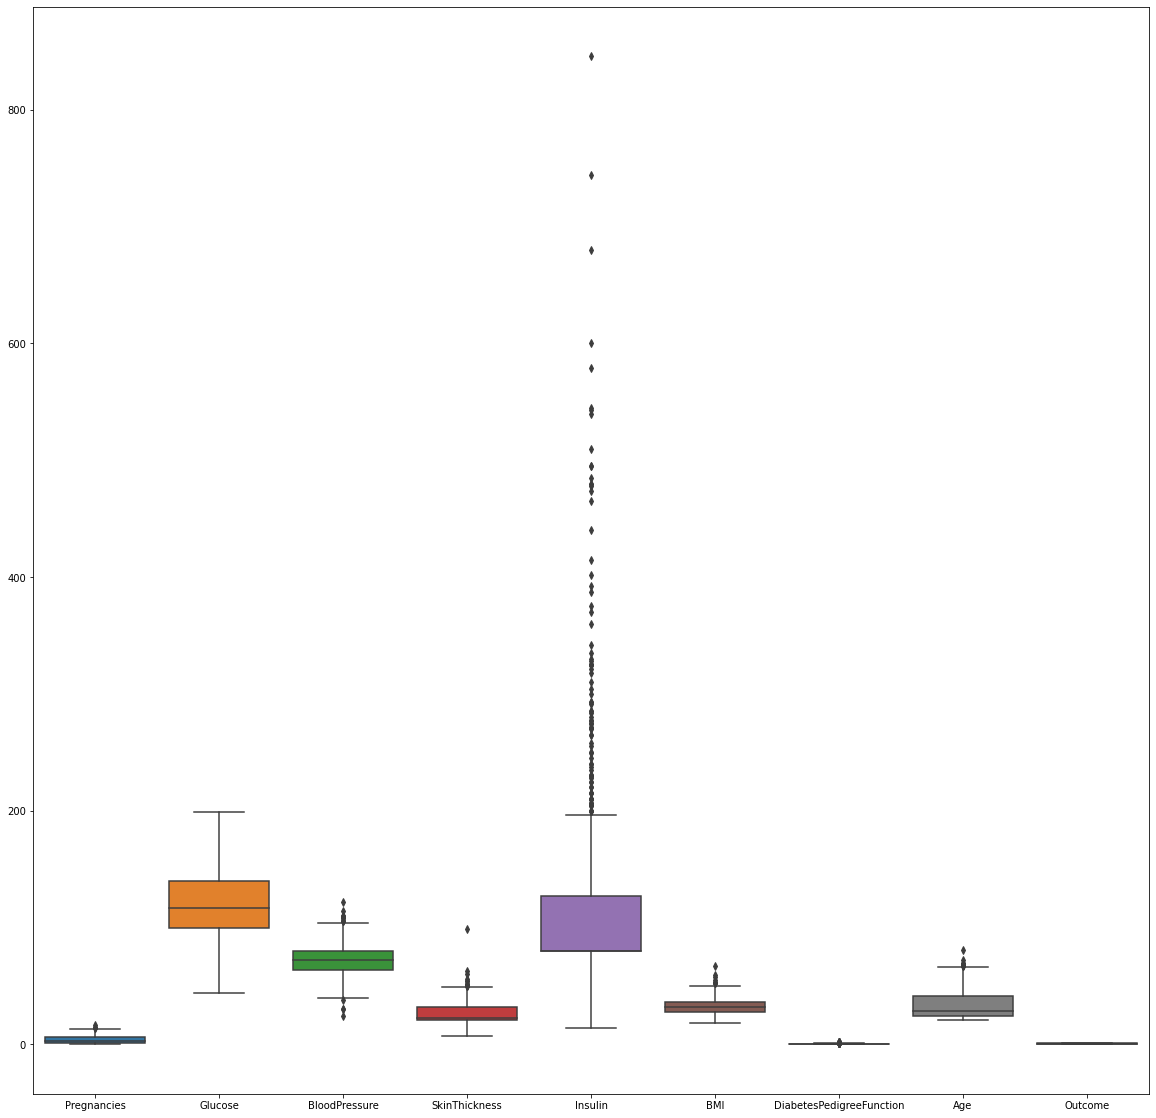

In [57]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=df,ax = ax)

In [59]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:>

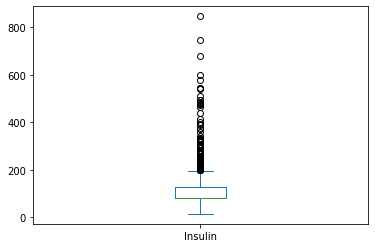

In [61]:
df.Insulin.plot.box()

In [64]:
df.Insulin.quantile(0.25)

79.79947916666667

In [65]:
df.Insulin.quantile(0.75)

127.25

In [70]:
dfNew = df[df.Insulin < df.Insulin.quantile(0.70)]
dfNew

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.0,31.000000,79.799479,44.0,0.403,43,1
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [71]:
ProfileReport(dfNew).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
df.shape[0] - dfNew.shape[0]

232

<AxesSubplot:>

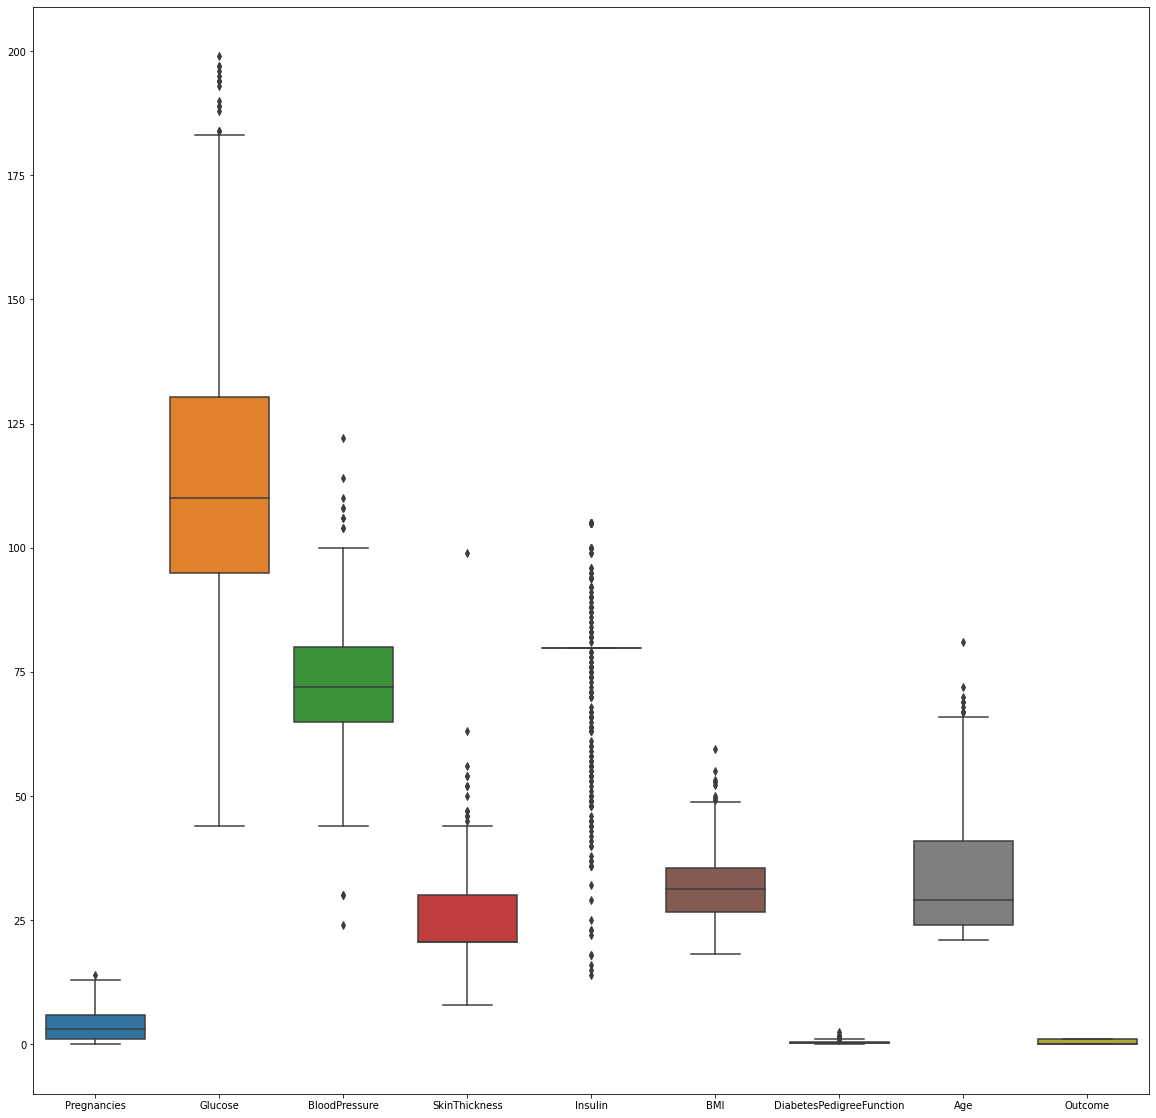

In [75]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=dfNew,ax = ax)

In [76]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [78]:
df.Pregnancies.value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [83]:
df.Pregnancies.quantile(0.98)

12.0

<AxesSubplot:>

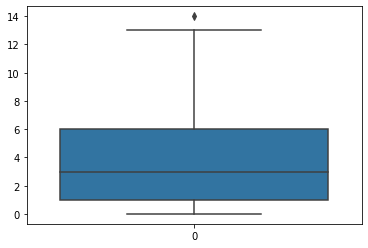

In [82]:
sns.boxplot(data=dfNew['Pregnancies'])

In [93]:
dfNew = df[df.Pregnancies < df.Pregnancies.quantile(0.98)]

<AxesSubplot:>

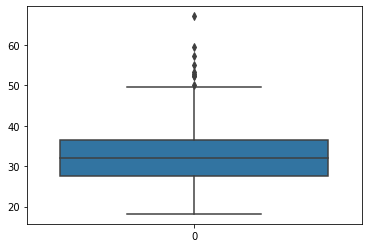

In [94]:
sns.boxplot(data=dfNew['BMI'])

In [95]:
dfNew = dfNew[dfNew.BMI < dfNew.BMI.quantile(0.99)]

In [99]:
dfNew = dfNew[dfNew.SkinThickness < dfNew.SkinThickness.quantile(0.99)]
dfNew = dfNew[dfNew.Insulin < dfNew.Insulin.quantile(0.95)]
dfNew = dfNew[dfNew.Age < dfNew.Age.quantile(0.99)]
dfNew = dfNew[dfNew.DiabetesPedigreeFunction < dfNew.DiabetesPedigreeFunction.quantile(0.95)]

<AxesSubplot:>

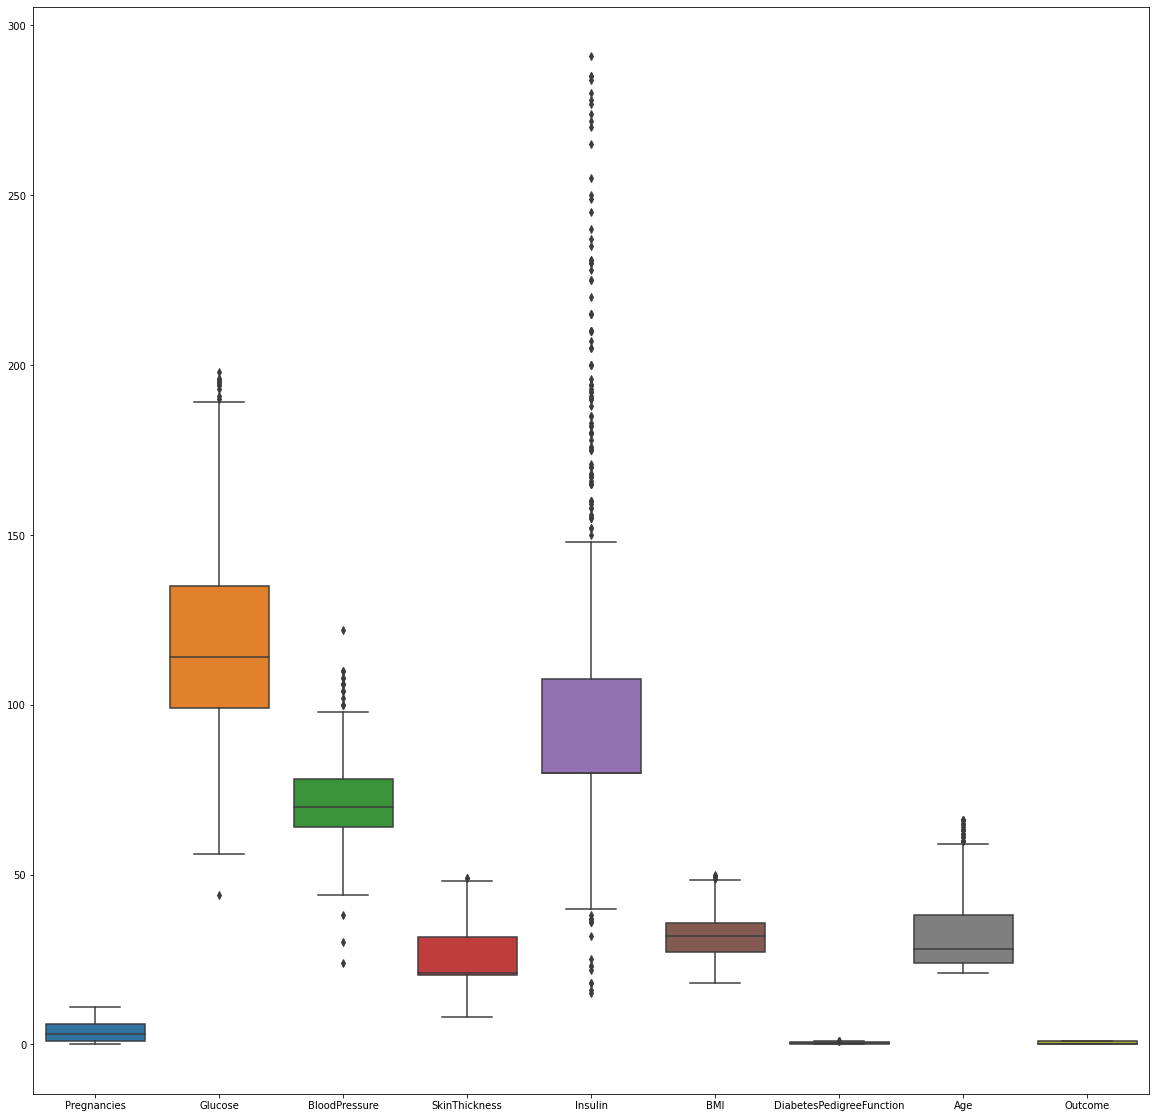

In [100]:
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=dfNew,ax = ax)

In [105]:
ProfileReport(dfNew).to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [109]:
y = dfNew.Outcome
X = dfNew.drop('Outcome',axis = 1)

In [113]:
scaler = StandardScaler()

In [114]:
scaledX = scaler.fit_transform(X)

<AxesSubplot:>

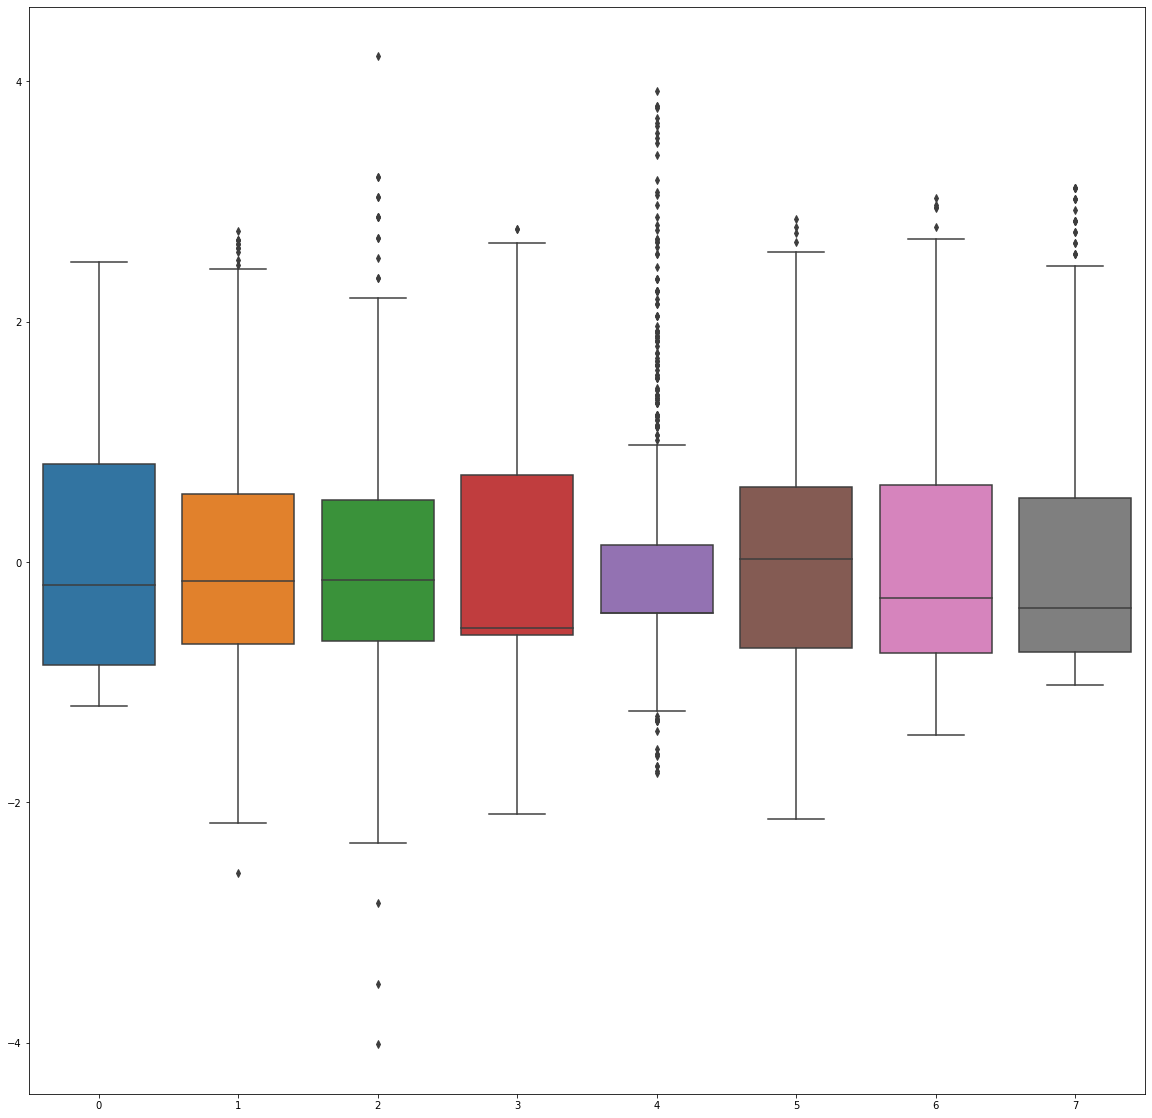

In [119]:
fif,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data=scaledX,ax = ax)

In [135]:
vif = pd.DataFrame()
vif['Features'] = dfNew.columns[:-1]

In [147]:
vif['VIF values'] = [variance_inflation_factor(scaledX,i) for i in range(scaledX.shape[1])]

In [148]:
vif

,Features,VIF values
0,Pregnancies,1.448029
1,Glucose,1.303358
2,BloodPressure,1.250515
3,SkinThickness,1.455101
4,Insulin,1.277119
5,BMI,1.495008
6,DiabetesPedigreeFunction,1.042501
7,Age,1.654461


In [149]:
X_tr,X_te,y_tr,y_te = train_test_split(scaledX,y,test_size=0.20,random_state=0)

In [150]:
print(X_tr.shape,X_te.shape,y_tr.shape,y_te.shape)

(516, 8) (130, 8) (516,) (130,)


In [151]:
logit = LogisticRegression()

In [152]:
logit.fit(X_tr,y_tr)

LogisticRegression()

In [153]:
logit.predict([X_te[0]])

array([1], dtype=int64)

In [159]:
dfNew.iloc[0,:-1]

Pregnancies                   6.000000
Glucose                     148.000000
BloodPressure                72.000000
SkinThickness                35.000000
Insulin                      79.799479
BMI                          33.600000
DiabetesPedigreeFunction      0.627000
Age                          50.000000
Name: 0, dtype: float64

In [170]:
logit.predict(scaler.transform([dfNew.iloc[0,:-1]]))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [171]:
y_pred = logit.predict(X_te)

In [183]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

<AxesSubplot:>

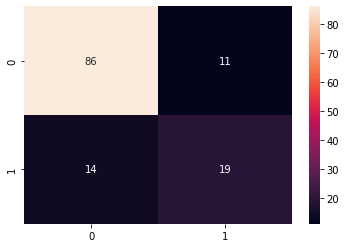

In [175]:
sns.heatmap(confusion_matrix(y_te,y_pred),annot=True)

In [179]:
accuracy_score(y_te,y_pred)

0.8076923076923077

In [181]:
tn, fp, fn, tp = confusion_matrix(y_te,y_pred).ravel()
tn, fp, fn, tp

(86, 11, 14, 19)

In [184]:
metrics.recall_score(y_te,y_pred)

0.5757575757575758

In [185]:
metrics.precision_score(y_te,y_pred)

0.6333333333333333

In [186]:
metrics.f1_score(y_te,y_pred)

0.6031746031746033

In [188]:
print(metrics.classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        97
           1       0.63      0.58      0.60        33

    accuracy                           0.81       130
   macro avg       0.75      0.73      0.74       130
weighted avg       0.80      0.81      0.80       130



In [191]:
logitv1 = LogisticRegression()
logitv2 = LogisticRegression(n_jobs=4,solver='liblinear')
logitv3 = LogisticRegression(solver='sag')

In [ ]:
# what is the best threshold
# which model to select